In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Classification trees

In [2]:
# train a decision tree on the iris data set
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

iris = datasets.load_iris()
# iris.keys()
X = iris['data'][:, 2:] # petal lenth & width
y = iris['target']

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X, y)
print(dt_clf.score(X, y))

0.9733333333333334


(2500, 2)


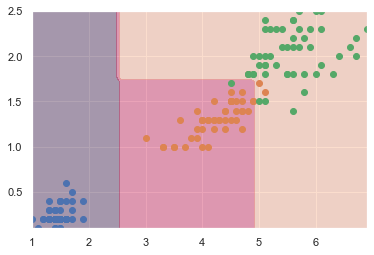

In [3]:
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50)
y1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 50)
xx, yy = np.meshgrid(x1, y1)
X_new = np.c_[xx.flatten(), yy.flatten()]
print(X_new.shape)
z = dt_clf.predict(X_new)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, levels=2, alpha=0.4)

mask0 = (y == 0)
plt.scatter(X[mask0, 0], X[mask0, 1])
mask0 = (y == 1)
plt.scatter(X[mask0, 0], X[mask0, 1])
mask0 = (y == 2)
plt.scatter(X[mask0, 0], X[mask0, 1])

## Regression trees

In [4]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

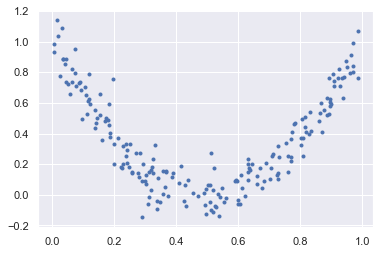

In [5]:
plt.plot(X.flatten(), y, 'b.')

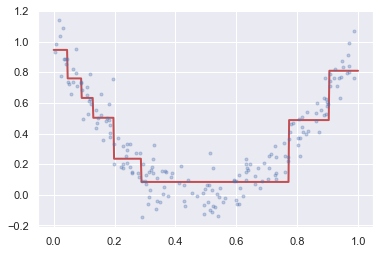

In [6]:
depth = 3
dt_reg = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X, y)
xs = np.linspace(0, 1, 500)
y_hat = dt_reg.predict(xs.reshape(-1, 1))
plt.plot(xs, y_hat, 'r-', linewidth=2)
plt.plot(X.flatten(), y, 'b.', alpha=0.3)

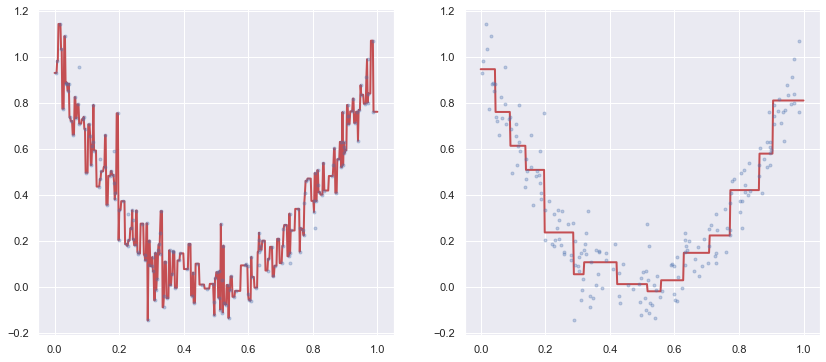

In [7]:
# build a full tree w/o regularization
f, ax = plt.subplots(1, 2, figsize=(14, 6))
dt_reg = DecisionTreeRegressor(random_state=42).fit(X, y)
xs = np.linspace(0, 1, 500)
y_hat = dt_reg.predict(xs.reshape(-1, 1))
ax[0].plot(xs, y_hat, 'r-', linewidth=2)
ax[0].plot(X.flatten(), y, 'b.', alpha=0.3)
# regularize
dt_reg = DecisionTreeRegressor(min_samples_leaf=10, random_state=42).fit(X, y)
y_hat = dt_reg.predict(xs.reshape(-1, 1))
ax[1].plot(xs, y_hat, 'r-', linewidth=2)
ax[1].plot(X.flatten(), y, 'b.', alpha=0.3)

## Exercises

In [8]:
# 1: approx. depth of decision tree with 1 million instances
np.log2(1000000)

19.931568569324174

# 2: Gini index
It is not necessary that the Gini index of a child node be always lower than that of the parent node. CART algorithm minimizes the weighted sum of child nodes' Gini index; so it is possible that one child node could have a higher Gini index, while the other node has smaller.

# 3: regularization
reducing max_depth will decreases the # of terminal nodes, so it should help reduce overfitting.

# 4: scaling and decision trees
scaling doesn't effect decision trees, so it won't help with underfitting

In [9]:
# 5: runtime: n*m*log(m), where m is # of instances, n is # of features
10 * np.log2(10 * 1000000) / np.log2(1000000)

11.666666666666666

# 7: decision trees on moons data set

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=10000, noise=0.40, random_state=53)
Xm.shape, ym.shape

((10000, 2), (10000,))

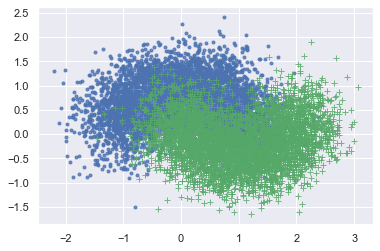

In [11]:
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], 'b.', alpha=0.8)
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], 'g+', alpha=0.8)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(Xm, ym, test_size=0.3, random_state=42)

In [13]:
params = {
    'max_leaf_nodes': np.linspace(2, 10000, 500, dtype=int),
}
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, verbose=1)
grid_cv.fit(xtrain, ytrain)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 42.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': array([    2,    22,    42,    62,    82,   102,   122,   142,   162,
         182,   202,   222,   242,   262,   282,   302,   322,   342,
         362,   382,   402,   422,   442,   462,   482,   502,   522,
         542,   563,   583,   603,   623,   643,   663,   683,   703,
         723,   743,   763,   783,   803,   823,   843,   863,   883,
         903,   923,   943,   963,   983,  1003,  1023,  1043,  1063,
        1083,  1103,  1124,  1144,  1164,  1184,  12...
        8657,  8677,  8697,  8717,  8737,  8757,  8777,  8797,  8817,
        8837,  8857,  8877,  8898,  8918,  8938,  8958,  8978,  8998,
        9018,  9038,  9058,  9078,  9098,  9118,  9138,  9158,  9178,
        9198,  9218,  9238,  9258,  9278,  9298,  9318,  9338,  9358,
        9378,  9398,  9418,  9438,  9459,  9479,  9499,  9519,  9539,
        9559,  9579,  9599,  9619,  9639,  9659,  9679,  9699

In [14]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=22, random_state=42)

In [15]:
grid_cv.best_estimator_.fit(xtrain, ytrain).score(xtest, ytest)

0.851

## 8: Growing Forests

In [16]:
from sklearn.model_selection import ShuffleSplit

In [27]:
from sklearn.base import clone

rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
best_dt_clf = grid_cv.best_estimator_
scores, forest = [], []
for train_idx, test_idx in rs.split(xtrain, ytrain):
    forest.append(clone(best_dt_clf)) # collect the trees
    current_model = forest[-1] # the most recenlty added model is the current model
    current_model.fit(xtrain[train_idx], ytrain[train_idx]) # train on each subset
    scores.append(current_model.score(xtest, ytest))
np.mean(scores)

0.786701

In [32]:
np.std(scores)

0.026698053177047282

In [31]:
# 8.c: for each instance, take a majority-vote of the predictions from each tree
import scipy as sp
y_pred = [sp.stats.mode([tree.predict(xi.reshape(1, 2)) for tree in forest]) for xi in xtest]

0.250004

In [72]:
# 8.d: accuracy score
np.mean(np.array([m[0] for m in y_pred]).flatten() == ytest)

0.8583333333333333

In [73]:
(.85 - .78) / .78

0.08974358974358967

In [87]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(),
    grid_cv.best_estimator_,
    n_estimators=1000, max_samples=100,
    bootstrap=True, oob_score=True,
    random_state=42, n_jobs=-1)
bag_clf.fit(xtrain, ytrain).score(xtest, ytest), bag_clf.oob_score_

(0.8563333333333333, 0.8585714285714285)

In [86]:
bag_clf.oob_decision_function_[:10]

array([[0.95040486, 0.04959514],
       [0.23553299, 0.76446701],
       [0.0597166 , 0.9402834 ],
       [0.10840932, 0.89159068],
       [0.40927419, 0.59072581],
       [0.57388664, 0.42611336],
       [0.08256881, 0.91743119],
       [0.03729839, 0.96270161],
       [0.54276986, 0.45723014],
       [0.70486815, 0.29513185]])